##### version: Borna & Alborz Alaeddini
# EDM vs. FFT for Hilbert Transform       

First we take a look at the first 10 rows of the data and see each value  assocciated with its coresponding column title.
### Displaying the dataset 

In [1]:
import pandas as pd

df = pd.read_csv("FormattedFile.csv", sep=",",encoding='latin')
# shows top 10 rows
df.head(10)

,Time,V_Phase1,V_Phase2,V_Phase3,I_Phase1,I_Phase2,I_Phase3,Frequency1,Frequency2,Frequency3,Angle1,Angle2,Angle3
0,0,-14222.38965,-1351.206543,15627.00977,-0.295724,0.304270,0.333872,0,0,0,0,0,0
1,20000,-14155.08496,-1454.817017,15683.60547,-0.286874,0.302744,0.333872,0,0,0,0,0,0
2,40000,-14096.35547,-1554.154053,15722.07031,-0.283517,0.300302,0.331736,0,0,0,0,0,0
3,60000,-14035.45508,-1655.629517,15761.58496,-0.260018,0.296335,0.323801,0,0,0,0,0,0
4,80000,-13982.04492,-1759.239990,15787.24023,-0.276803,0.297861,0.324107,0,0,0,0,0,0
5,100000,-13917.95996,-1863.917969,15819.26465,-0.256355,0.287790,0.316782,0,0,0,0,0,0
6,120000,-13864.54980,-1955.779053,15849.19043,-0.254830,0.283822,0.310984,0,0,0,0,0,0
7,140000,-13797.28027,-2055.115967,15889.75488,-0.241096,0.282907,0.312510,0,0,0,0,0,0
8,160000,-13727.83984,-2150.183105,15927.13477,-0.229804,0.284127,0.305490,0,0,0,0,0,0
9,180000,-13663.75488,-2253.793457,15965.59961,-0.220344,0.276193,0.295724,0,0,0,0,0,0


### Start of the implementation
Here we used Rivan's code for opening the data file and importing the data point values by appending them to their initialized emtpy python lists.

In [2]:
import numpy as np
from scipy import fftpack
import csv
import matplotlib.pyplot as plt
import emd

T,V1,V2,V3,I1,I2,I3,F1,F2,F3,A1,A2,A3=[],[],[],[],[],[],[],[],[],[],[],[],[];
# Consecutively; Time,Phase1-2-3 Voltage,Current, Frequency, Angle Values

Title= ['Time',
             'V_Phase1', 'V_Phase2','V_Phase3',
             'I_Phase1','I_Phase2','I_Phase3',
             'Frequency1','Frequency2','Frequency3',
             'Angle1','Angle2','Angle3']
#Basically, they are from title row in excel.

#File is opened here and all of the data is put into lists.
with open('FormattedFile.csv','r') as csv_file:
    csv_reader=csv.DictReader(csv_file)
    for col in csv_reader:
        T.append(float(col[Title[0]]))
        V1.append(float(col[Title[1]])); V2.append(float(col[Title[2]])); V3.append(float(col[Title[3]]));
        I1.append(float(col[Title[4]])); I2.append(float(col[Title[5]])); I3.append(float(col[Title[6]]));
        F1.append(float(col[Title[7]])); F2.append(float(col[Title[8]])); F3.append(float(col[Title[9]]));
        A1.append(float(col[Title[10]])); A2.append(float(col[Title[11]])); A3.append(float(col[Title[12]]));

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


checking the values to see if they match the table from the table above.


In [3]:
print(*V1[0:10])

-14222.38965 -14155.08496 -14096.35547 -14035.45508 -13982.04492 -13917.95996 -13864.5498 -13797.28027 -13727.83984 -13663.75488


#### One cycle of the three voltage phases at 50Hz

There are 1000 samples in one cylce of the signal so the sampling frequency of the data becomes:

samp_frq_period = (once period) / (number of samples)

samp_frq_period = 0.02s / 1000

samp_frq = 1 / samp_frq_period

samp_freq = 50000 Hz

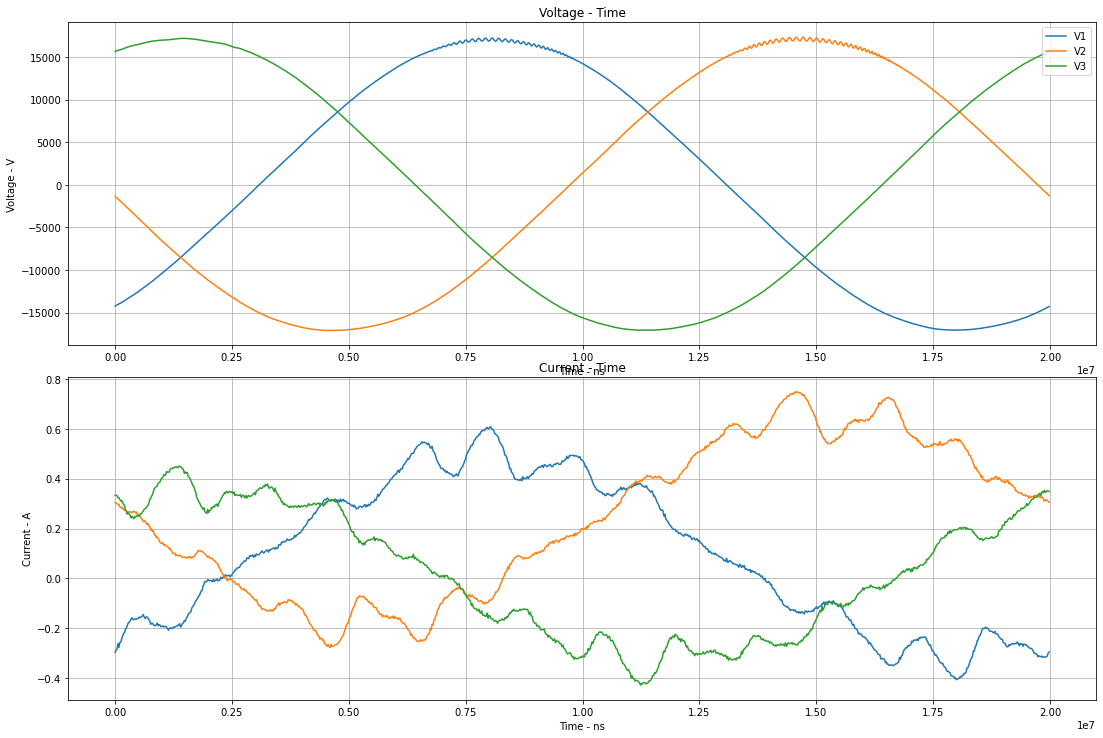

In [4]:
samp_frq = 50000

sample = 1000

window = 1
nl = 0
nu = 1
sl = int(nl*sample/window)
su = int(nu*sample/window)
fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.tight_layout()

# Plotting of the voltage values
ax[0].set_title("Voltage - Time")
ax[0].set_ylabel("Voltage - V")
ax[0].set_xlabel("Time - ns") 

ax[0].plot(T[sl:su],V1[sl:su],label='V1')
ax[0].plot(T[sl:su],V2[sl:su],label='V2')
ax[0].plot(T[sl:su],V3[sl:su],label='V3')
ax[0].grid()
ax[0].legend(loc="upper right")

# Plotting of the currtent values
ax[1].set_title("Current - Time")
ax[1].set_ylabel("Current - A")
ax[1].set_xlabel("Time - ns") 

ax[1].plot(T[sl:su],I1[sl:su],label='I1')
ax[1].plot(T[sl:su],I2[sl:su],label='I2')
ax[1].plot(T[sl:su],I3[sl:su],label='I3')
ax[1].grid()



## Voltage


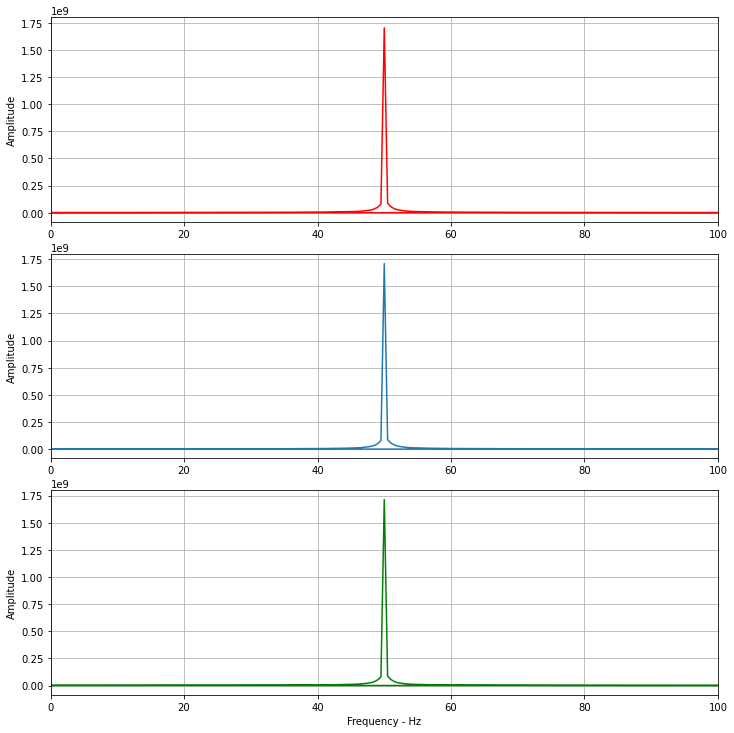

In [5]:
def fourier(x):
    V_fft=fftpack.fft(x)
    Amplitude=np.abs(V_fft)
    Power=Amplitude**2
    Angle=np.angle(V_fft)
    freq=fftpack.fftfreq(len(x),d=(T[1]-T[0])/10**9) #nsecond to second -> time step 20 usecond 
    Amp_Freq=np.array([Amplitude,freq])
    peak_freq=Amp_Freq[1,Amp_Freq[0,:].argmax()]
    Amplitude=Amplitude*2
    Amp=[]
    for i in range(0,len(freq)):
        if int(freq[i])<0:
            Amplitude[i]=0;
        elif freq[i]==0:
            Amplitude[i]=Amplitude[i]/2;
    return freq, Amplitude

fig, ax = plt.subplots(nrows=3, sharex=False, sharey=True, figsize=(10,10))
fig.tight_layout()
ax[0].grid();ax[1].grid();ax[2].grid()
ax[0].set_xlim(0,100);ax[1].set_xlim(0,100);ax[2].set_xlim(0,100)
ax[0].set_ylabel("Amplitude");ax[1].set_ylabel("Amplitude");ax[2].set_ylabel("Amplitude")
ax[2].set_xlabel("Frequency - Hz")
plt.grid(True)

f, a = fourier(V1)
ax[0].plot(f,a,'-r')
f, a = fourier(V2)
ax[1].plot(f,a)
f, a = fourier(V3)
ax[2].plot(f,a,'-g')



## Current

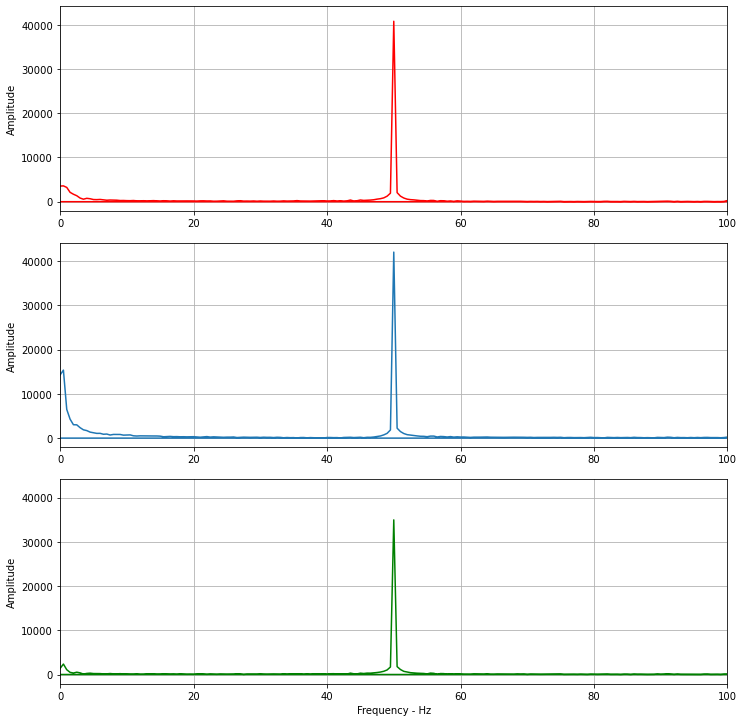

In [6]:
fig, ax = plt.subplots(nrows=3, sharex=False, sharey=True, figsize=(10,10))
fig.tight_layout()
ax[0].grid();ax[1].grid();ax[2].grid()
ax[0].set_xlim(0,100);ax[1].set_xlim(0,100);ax[2].set_xlim(0,100)
ax[0].set_ylabel("Amplitude");ax[1].set_ylabel("Amplitude");ax[2].set_ylabel("Amplitude")
ax[2].set_xlabel("Frequency - Hz")
plt.grid(True)

f, a = fourier(I1)
ax[0].plot(f,a,'-r')
f, a = fourier(I2)
ax[1].plot(f,a)
f, a = fourier(I3)
ax[2].plot(f,a,'-g')

## Empirical Mode Decomposition 

Now we analyze the signal using EMD analysis.  
#### The three voltage phases

<AxesSubplot:xlabel='Time (samples)'>

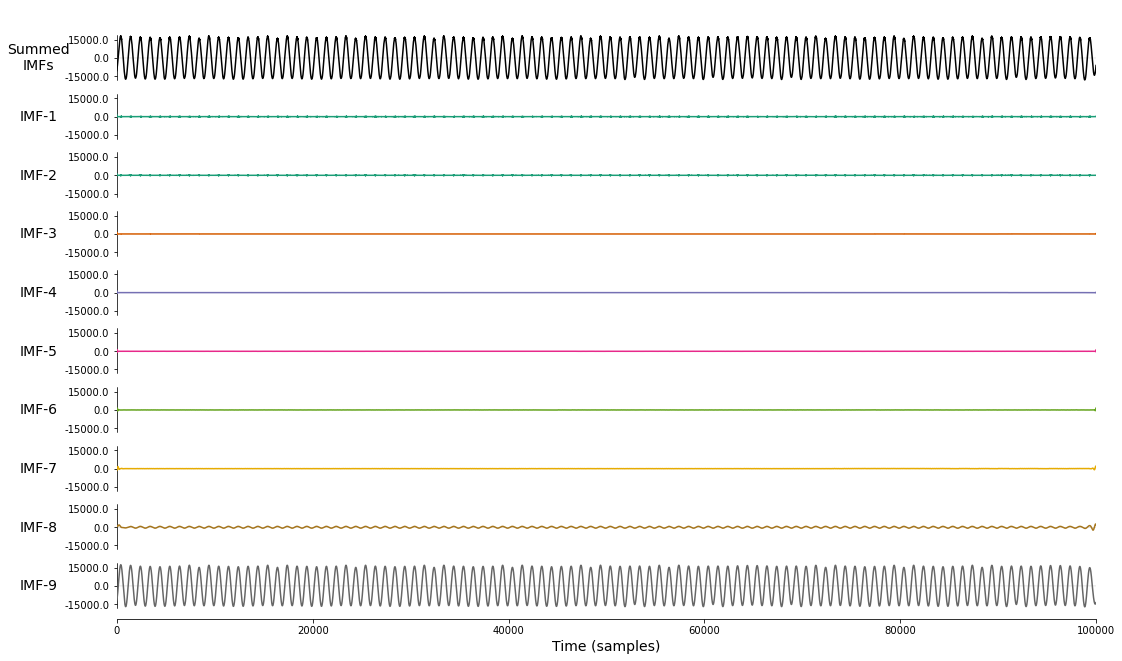

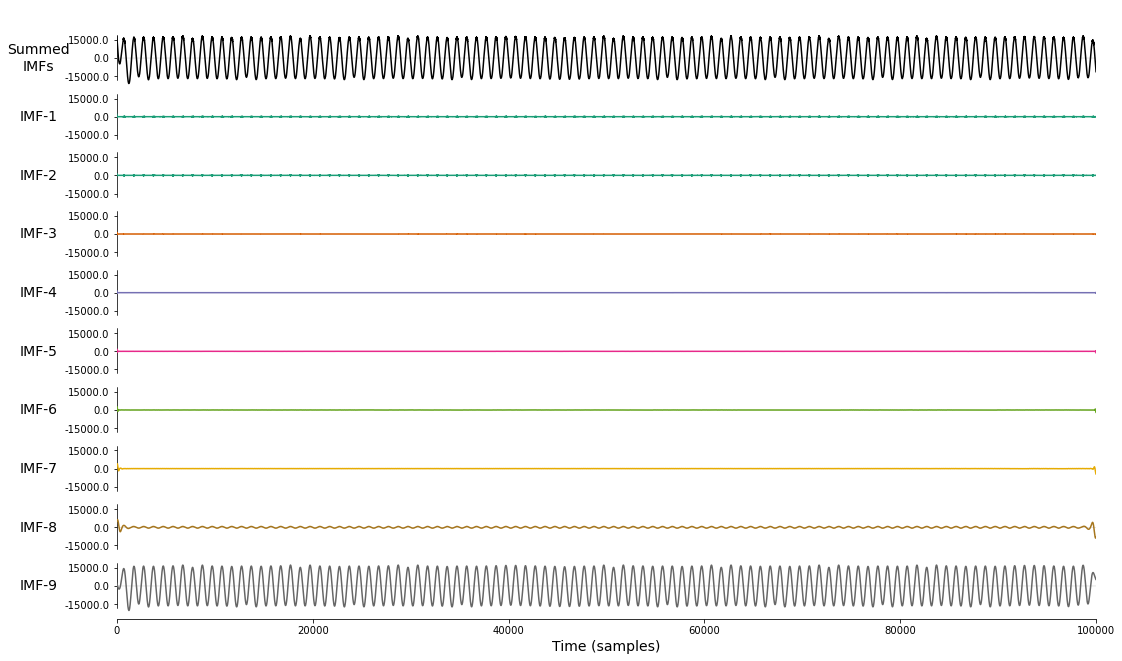

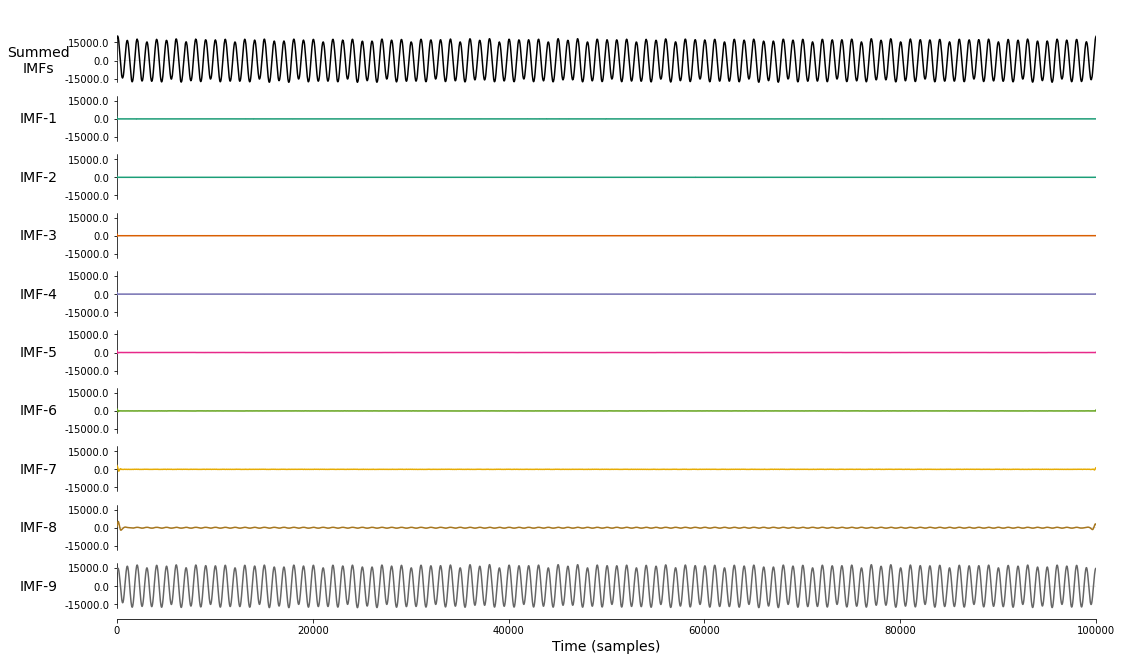

In [7]:
imfV1 = emd.sift.mask_sift(np.asarray(V1[:]))
emd.plotting.plot_imfs(imfV1[:samp_frq*3,:])

imfV2 = emd.sift.mask_sift(np.asarray(V2[:]))
emd.plotting.plot_imfs(imfV2[:samp_frq*3,:])

imfV3 = emd.sift.mask_sift(np.asarray(V3[:]))
emd.plotting.plot_imfs(imfV3[:samp_frq*3,:])

#### The three current phases 

<AxesSubplot:xlabel='Time (samples)'>

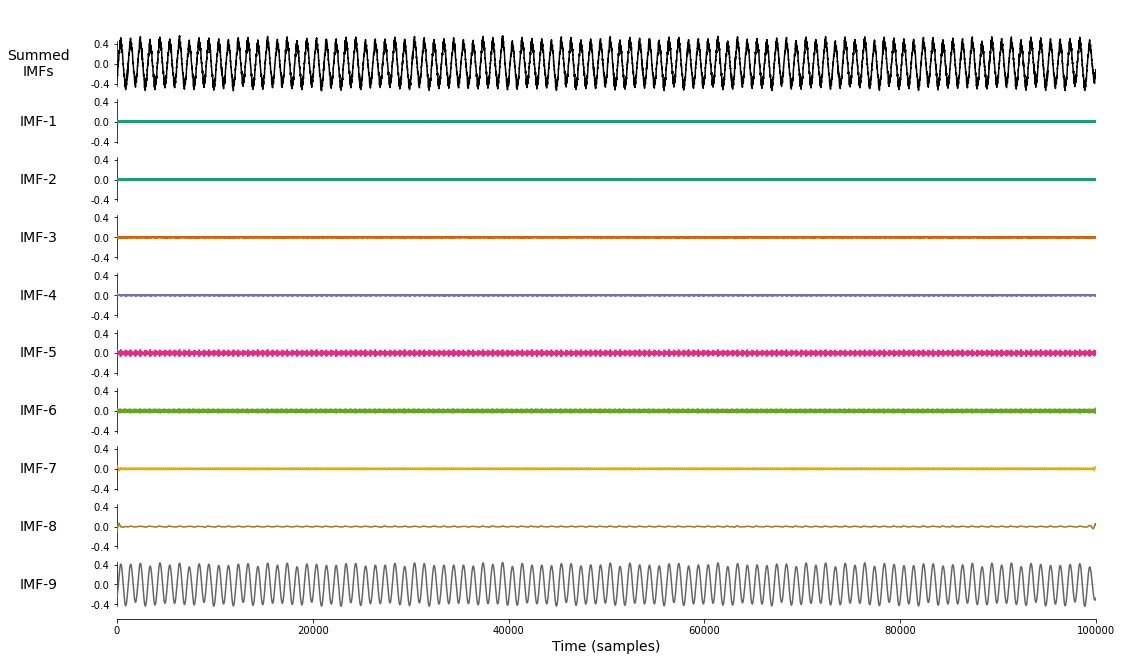

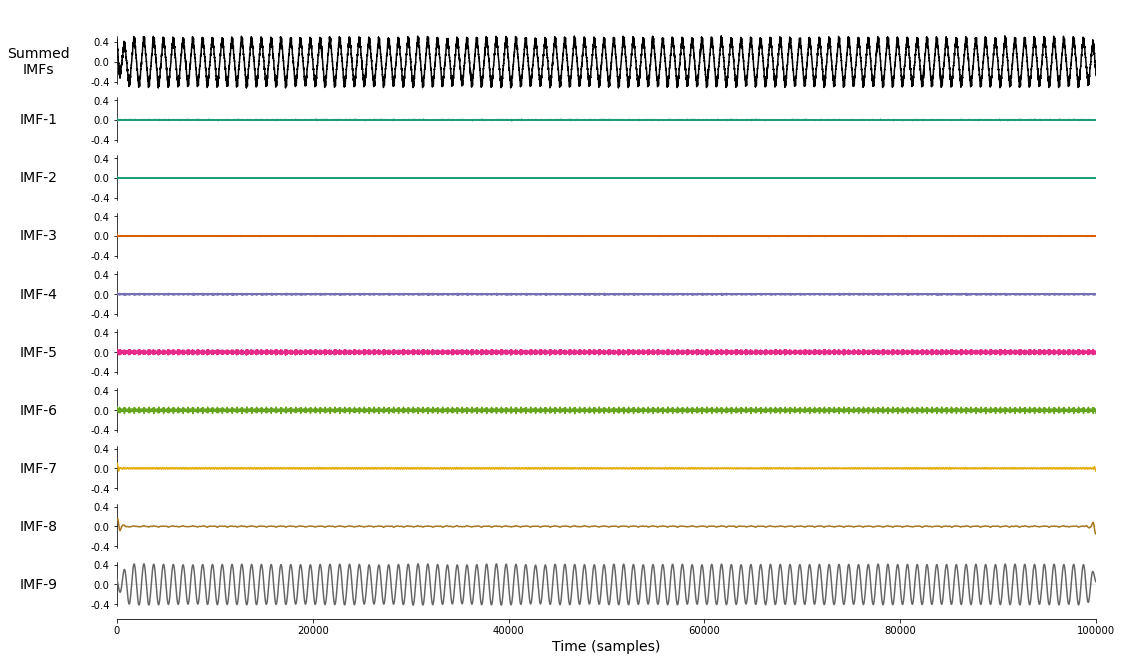

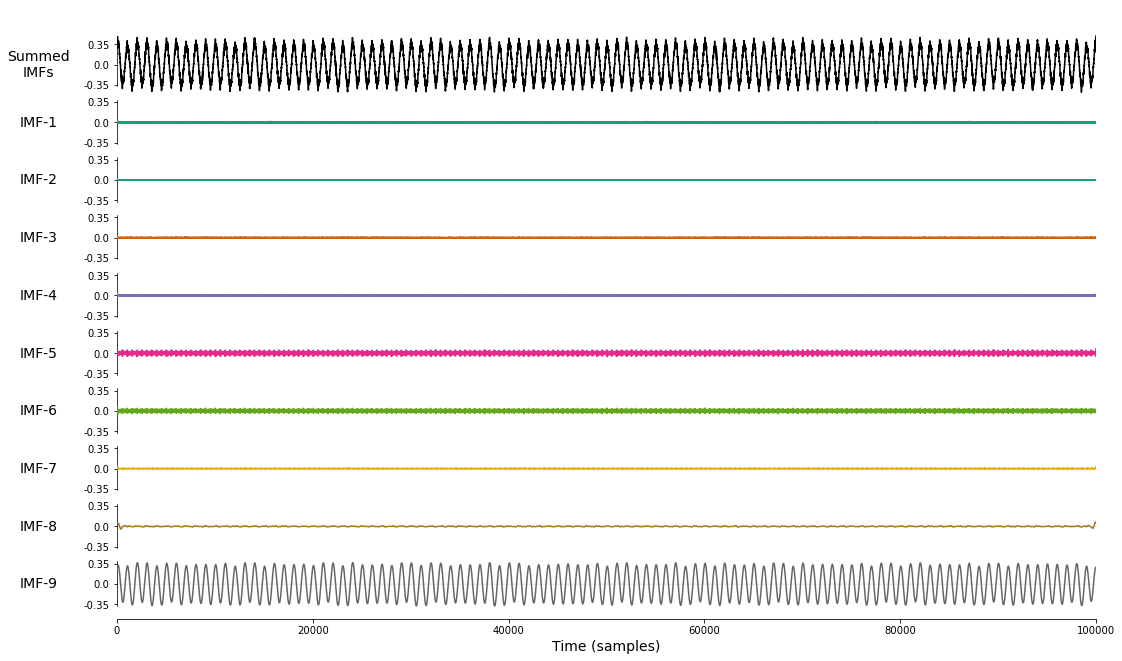

In [8]:
imfI1 = emd.sift.mask_sift(np.asarray(I1[:]))
emd.plotting.plot_imfs(imfI1[:samp_frq*3,:])

imfI2 = emd.sift.mask_sift(np.asarray(I2[:]))
emd.plotting.plot_imfs(imfI2[:samp_frq*3,:])

imfI3 = emd.sift.mask_sift(np.asarray(I3[:]))
emd.plotting.plot_imfs(imfI3[:samp_frq*3,:])

## Hilbert-Huang Transform

Here we are implementing a time/freq spectrum of the instantanious frequency and its corresponding power

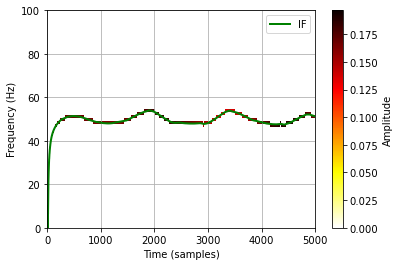

In [9]:
IP1, IF1, IA1 = emd.spectra.frequency_transform(imfI1, samp_frq, 'nht')
IP2, IF2, IA2 = emd.spectra.frequency_transform(imfI2, samp_frq, 'nht')
IP3, IF3, IA3 = emd.spectra.frequency_transform(imfI3, samp_frq, 'nht')

#fig, ax = plt.subplots(nrows=3, sharex=False, sharey=True, figsize=(10,10))

# Carrier frequency histogram definition
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 100, 24*3, 'linear')

f, hht = emd.spectra.hilberthuang(IF1[:, 8, None], IA1[:, 8, None], freq_edges, mode='power', sum_time=False)
time_centres = np.arange(100001)-.5

# Add IF axis and legend
#plt.figure(figsize=(10, 15))
plt.plot(IF1[:, 8], 'g', linewidth=2)
plt.legend(['IF'])
fig.tight_layout()

# Plot HHT
plt.pcolormesh(time_centres, freq_edges, hht[:, :100000], cmap='hot_r', vmin=0)

# Set colourbar
cb = plt.colorbar()
cb.set_label('Amplitude', rotation=90)

#plt.plot(IF1[:, 8], 'g', linewidth=1)

# Set lims and labels
plt.xlim(0, len(T[:5000]))
plt.ylim(0, 100)
#plt.yticks(np.arange(45, 55, step=1))
plt.xlabel('Time (samples)')
plt.ylabel('Frequency (Hz)')
plt.grid()




<AxesSubplot:title={'center':'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

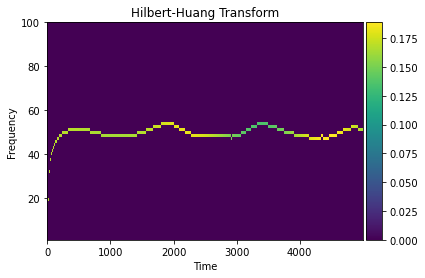

In [10]:
emd.plotting.plot_hilberthuang(hht, time_centres, freq_centres,
                               cmap='viridis', time_lims=(0, len(T[:5000])-1), log_y=False)

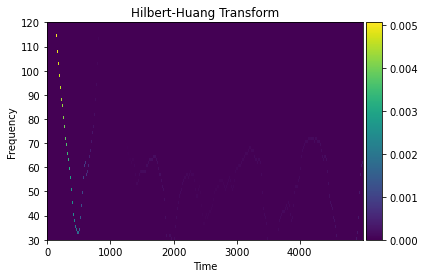

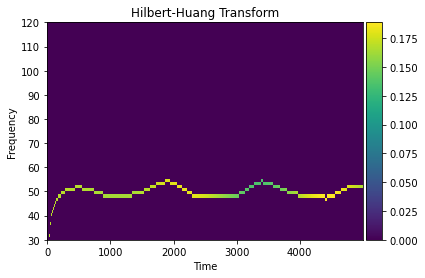

In [11]:
def getHH(x,n=0,samp_frq=50000):
    x = np.asarray(x)
    imf = emd.sift.mask_sift(x[:])
    IP, IF, IA = emd.spectra.frequency_transform(imf, samp_frq, 'nht')
    # Carrier frequency histogram definition
    freq_edges, freq_centres = emd.spectra.define_hist_bins(30, 120, 24*3, 'linear')
    f, hht = emd.spectra.hilberthuang(IF[:, n, None], IA[:, n, None], freq_edges, mode='power', sum_time=False)
    time_centres = np.arange(len(x)+1)-.5
    return hht , time_centres, freq_centres

hht, time_centres, freq_centres = getHH(I1,7,samp_frq)

emd.plotting.plot_hilberthuang(hht, time_centres, freq_centres,cmap='viridis', time_lims=(0, len(T[:5000])-1),  log_y=False)

hht, time_centres, freq_centres = getHH(I1,8,samp_frq)

emd.plotting.plot_hilberthuang(hht, time_centres, freq_centres,cmap='viridis', time_lims=(0, len(T[:5000])-1),  log_y=False)
hht.shape
fig.tight_layout()

In [47]:
from time import sleep
s,e = 0, len(T[:5000])
frq_lim = [45,55]
def getHH(x,IMFn=0,samp_frq=50000,title="Title",ax =None , s =0 , e = 2000,frq=[], display=False):
    
    x = np.asarray(x)
    imf = emd.sift.mask_sift(x[:])
    IP, IF, IA = emd.spectra.frequency_transform(imf, samp_frq, 'nht')
    
    # Test harmonic conditions
    df = emd.imftools.assess_harmonic_criteria(IP, IF, IA, num_segments=20, base_imf=IMFn,print_result = display )
    
    # Extract cycle locations
    #all_cycles = emd.cycles.get_cycle_vector(IP, return_good=False)
    #good_cycles = emd.cycles.get_cycle_vector(IP, return_good=True)
    
    # Carrier frequency histogram definition
    freq_edges, freq_centres = emd.spectra.define_hist_bins(frq[0],frq[1], 24*3, 'linear')
    f, hht = emd.spectra.hilberthuang(IF[:, IMFn, None], IA[:, IMFn, None], freq_edges, mode='power', sum_time=False)
    time_centres = np.arange(100001)-.5
    
    # Plotting 
    HH = emd.plotting.plot_hilberthuang(hht, time_centres, freq_centres,cmap='viridis', time_lims=(s, e-1), ax=ax ,log_y=False)
    HH.grid(visible=True, which='major', color='grey', linestyle='-')
    HH.grid(visible=True, which='minor', color='r', linestyle='-', alpha=0.2)
    HH.minorticks_on()
    HH.set_title("Hilbert-Huang Transform"+str(title))
    HH.set_xlabel("Time ( in samples )")
    fig.tight_layout()
    
    return HH, IF[s:e, IMFn, None], IP[s:e, IMFn, None], IA[s:e, IMFn, None]


def getUP(IP):
    unwrapped = np.unwrap(IP[:, ])
    # Gets maxima and minima
    max_locs, max_mag = emd.sift.get_padded_extrema(unwrapped, pad_width=0, mode='peaks')
    min_locs, min_mag = emd.sift.get_padded_extrema(unwrapped, pad_width=0, mode='troughs')
    val=[]
    past = 0
    for j in range(unwrapped.shape[0]):
        val.append(past + unwrapped[j] )
        if unwrapped[j] in max_mag:
            past+= unwrapped[j]
    return np.asarray(val), [[max_locs, max_mag],[min_locs, min_mag]]
    




## Analyzing the behavior of the signal 
### Begining - I1 I2 & I3 data 


I1

 Max Power detected 0.18869937836661332

I2

 Max Power detected 0.17680638823142927

I3

 Max Power detected
 0.14385179589594724


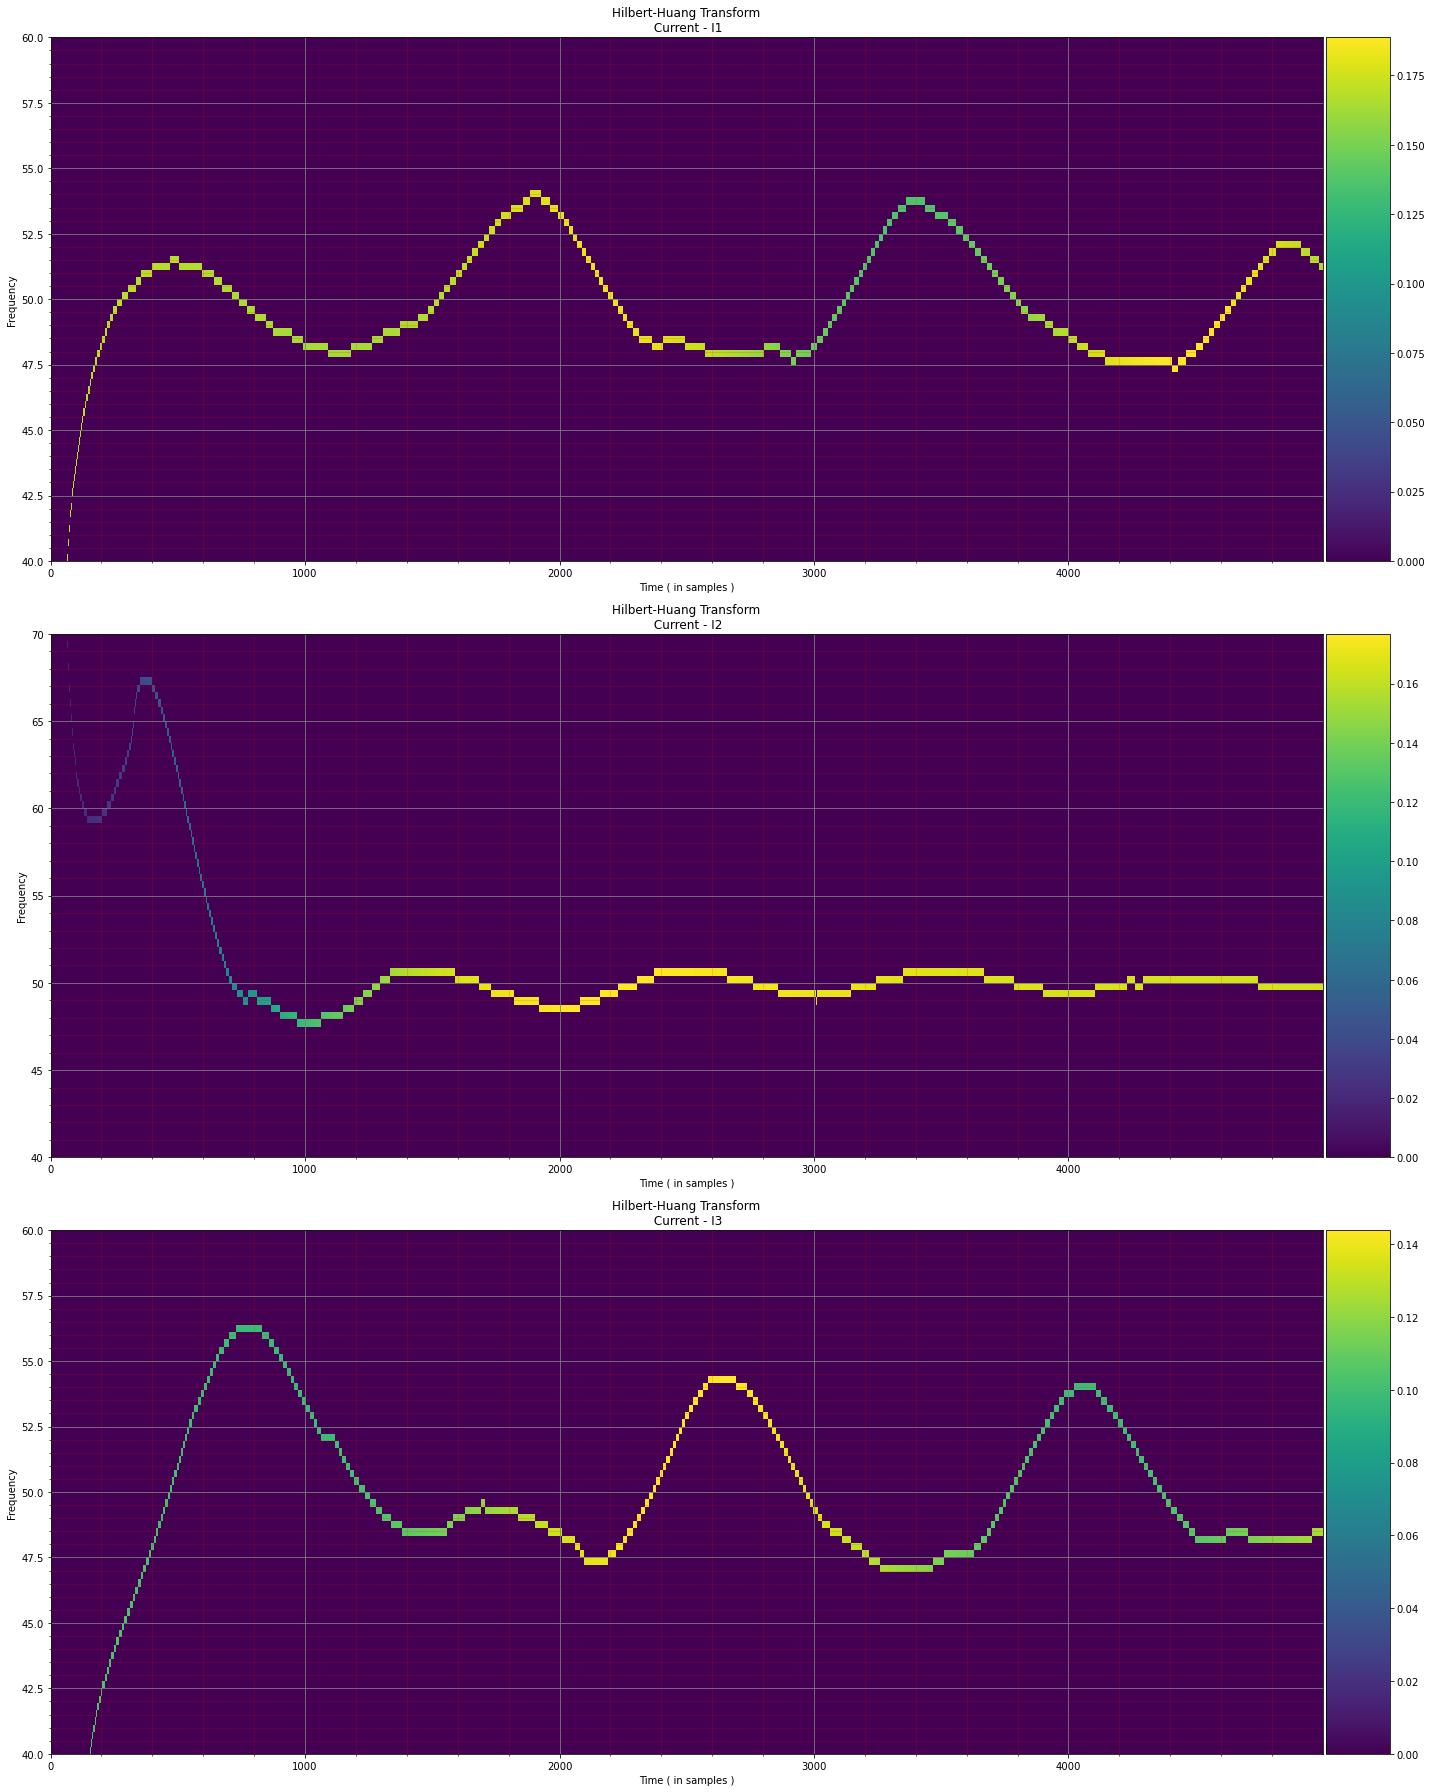

In [48]:
fig , ax = plt.subplots(nrows=3,figsize=(20,25))
print("\nI1")
HH, IF, IP, IA = getHH(I1,8,samp_frq,"\n Current - I1",ax[0],s=s,e=e,frq=[40,60])

print("\n Max Power detected",np.max(IA)**2)
print("\nI2")
HH, IF, IP, IA = getHH(I2,8,samp_frq,"\n Current - I2",ax[1],s=s,e=e,frq=[40,70])
print("\n Max Power detected",np.max(IA)**2)


print("\nI3")
HH, IF, IP, IA = getHH(I3,8,samp_frq,"\n Current - I3",ax[2],s=s,e=e,frq=[40,60])
print("\n Max Power detected\n",np.max(IA)**2)



### Middle - I1 I2 & I3 data 


I1

 Max Power detected
 0.18663994343694412

I2

 Max Power detected 
 0.16928498047268561

I3

 Max Power detected 
 0.14124946812463454


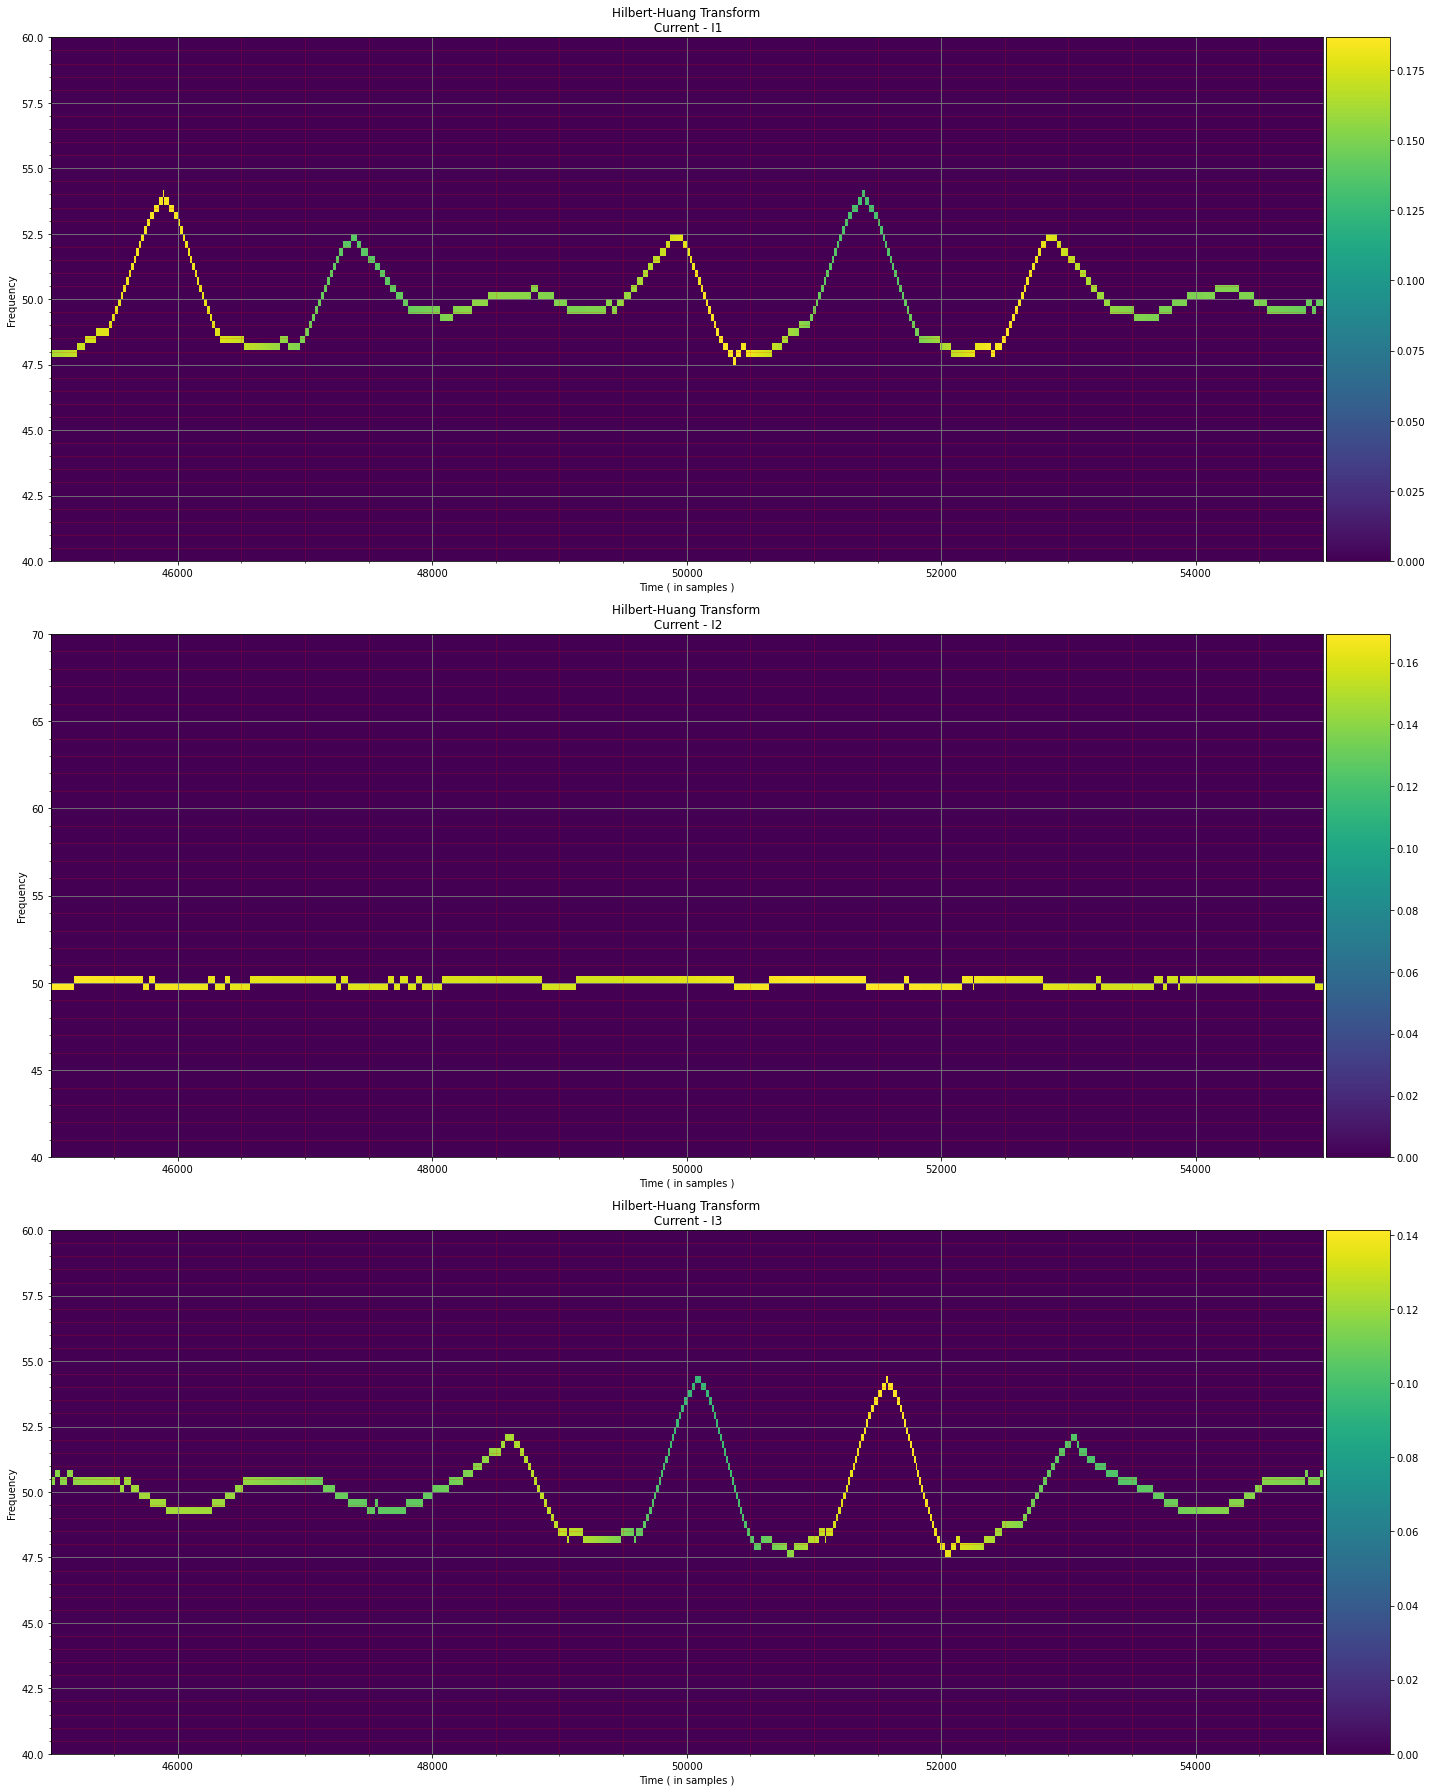

In [49]:
fig , ax = plt.subplots(nrows=3,figsize=(20,25))
print("\nI1")
HH, IF, IP, IA = getHH(I1,8,samp_frq,"\n Current - I1",ax[0],s=45000,e=55000,frq=[40,60])
print("\n Max Power detected\n",np.max(IA)**2)
print("\nI2")
HH, IF, IP, IA = getHH(I2,8,samp_frq,"\n Current - I2",ax[1],s=45000,e=55000,frq=[40,70])
print("\n Max Power detected \n",np.max(IA)**2)
print("\nI3")
HH, IF, IP, IA = getHH(I3,8,samp_frq,"\n Current - I3",ax[2],s=45000,e=55000,frq=[40,60])
print("\n Max Power detected \n",np.max(IA)**2)


### End - I1 I2 & I3 data 


I1

 Max Power detected
 0.18434230287137504

I3

 Max Power detected 
 0.17774500559161022

I3

 Max Power detected 
 0.12978757293018975


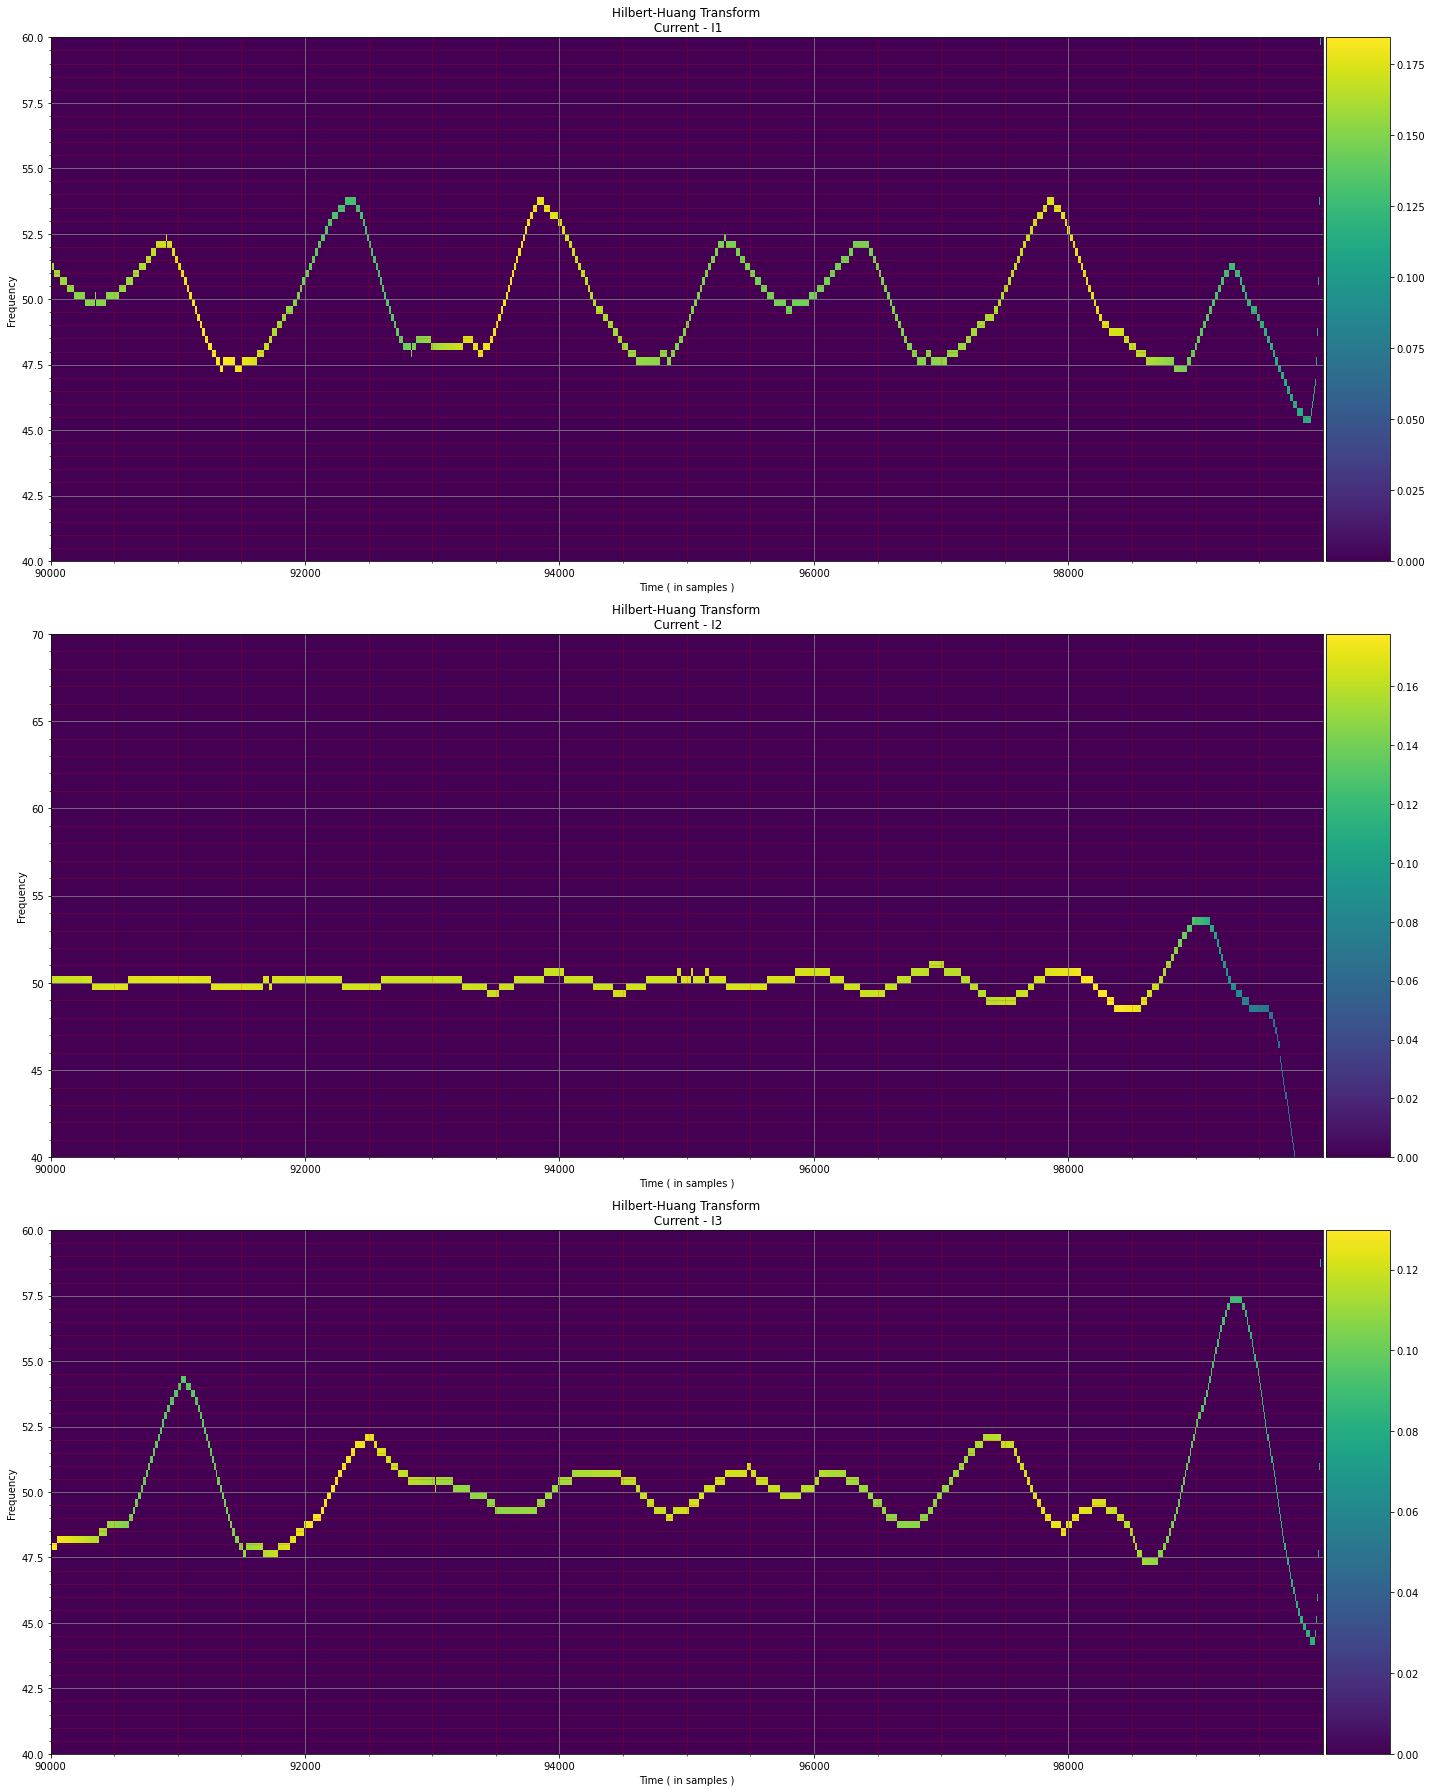

In [50]:
fig , ax = plt.subplots(nrows=3,figsize=(20,25))
print("\nI1")
HH, IF, IP, IA = getHH(I1,8,samp_frq,"\n Current - I1",ax[0],s=90000,e=len(T),frq=[40,60])
print("\n Max Power detected\n",np.max(IA)**2)
print("\nI3")
HH, IF, IP, IA = getHH(I2,8,samp_frq,"\n Current - I2",ax[1],s=90000,e=len(T),frq=[40,70])
print("\n Max Power detected \n",np.max(IA)**2)
print("\nI3")
HH, IF, IP, IA = getHH(I3,8,samp_frq,"\n Current - I3",ax[2],s=90000,e=len(T),frq=[40,60])
print("\n Max Power detected \n",np.max(IA)**2)


### Begining - V1, V2, & V3 data


V1

 Max Power detected
 305196299.75966066

V2

 Max Power detected 
 302870958.80953383

V3

 Max Power detected
 314591505.8678557


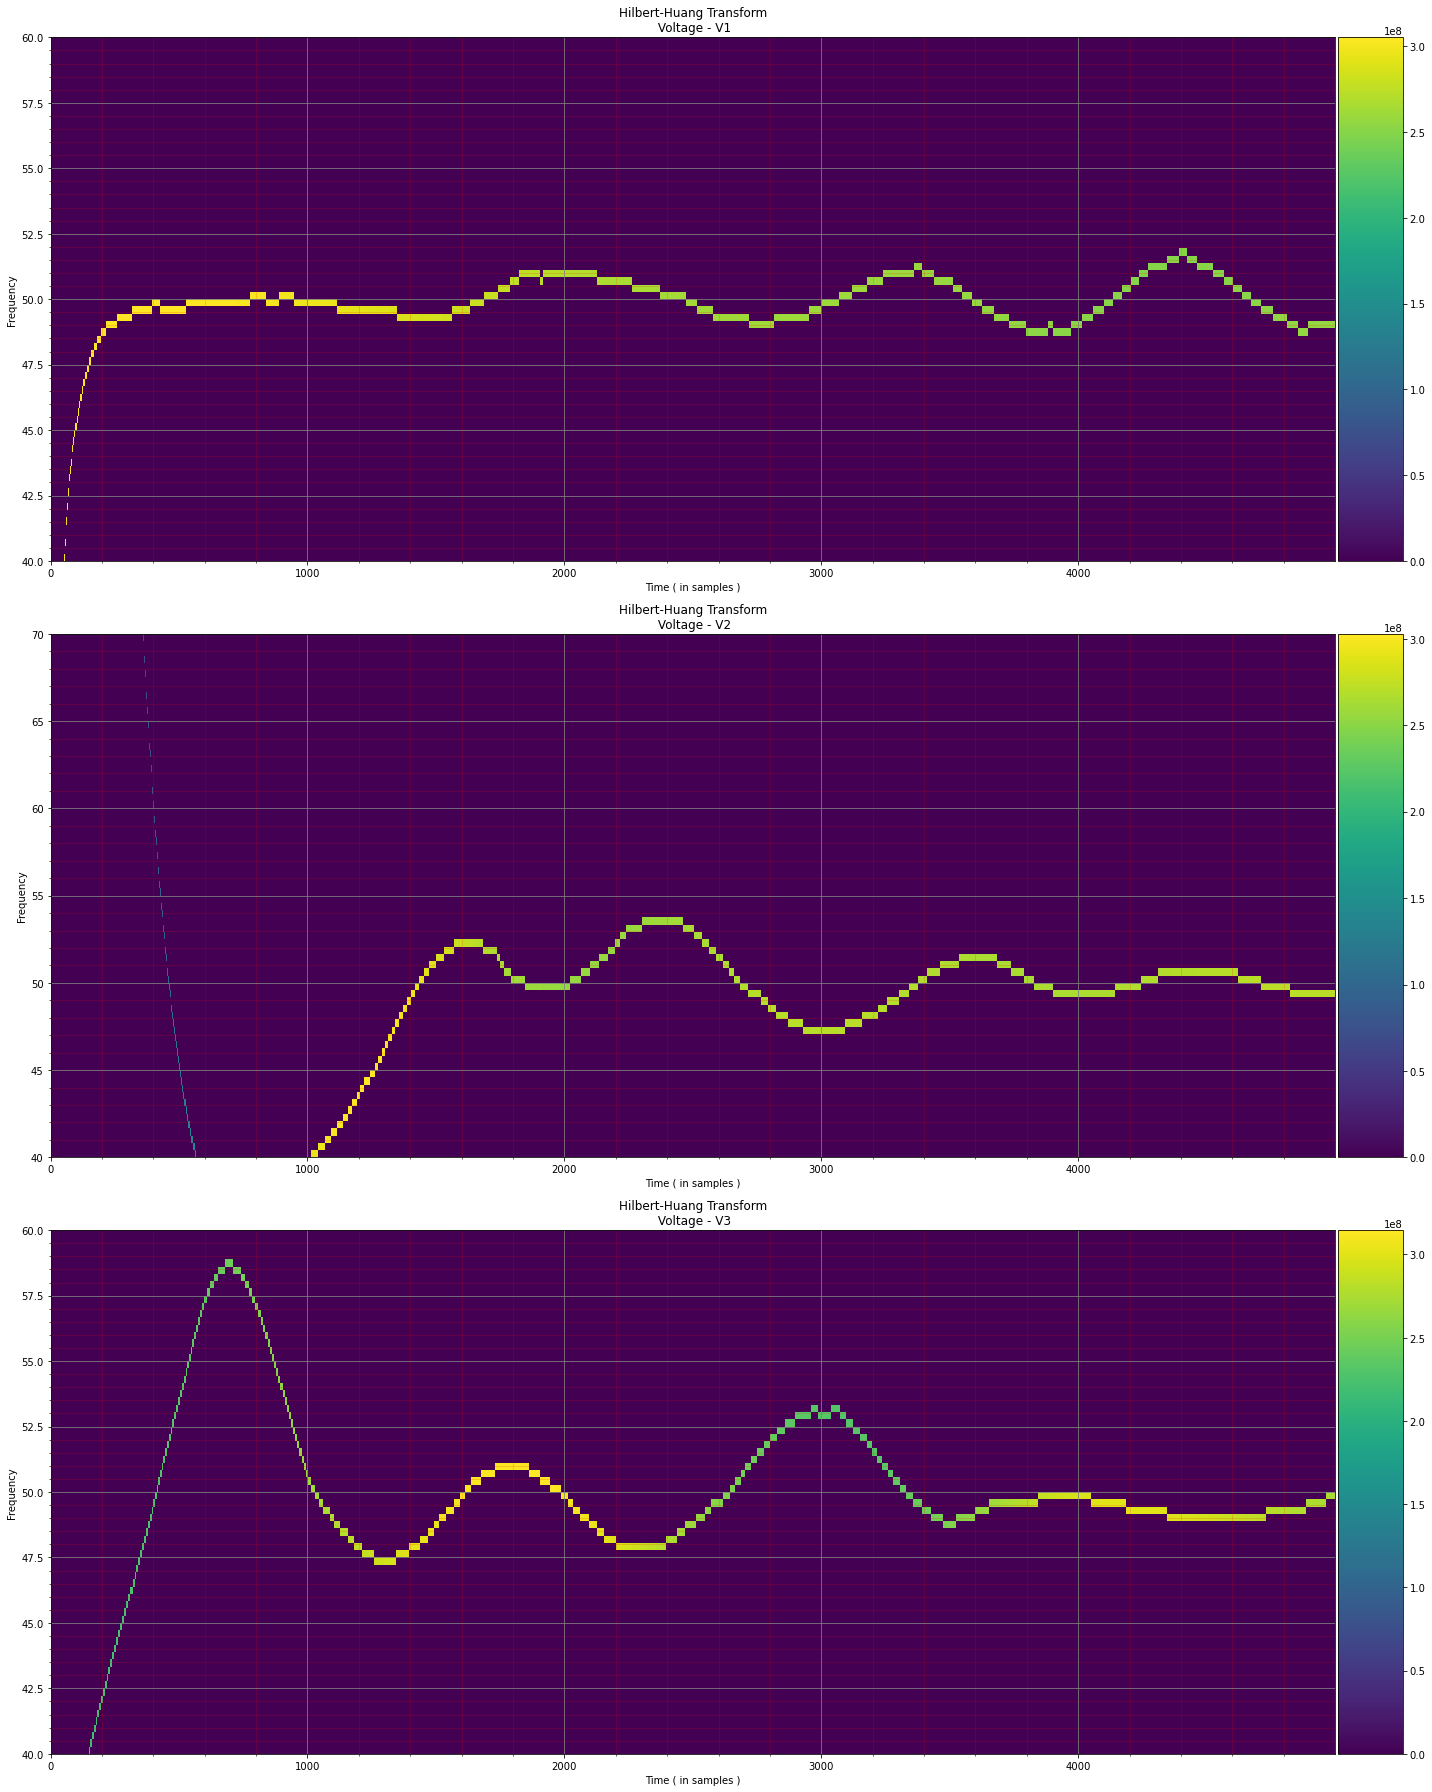

In [51]:
fig , ax = plt.subplots(nrows=3,figsize=(20,25))
print("\nV1")
HH, IF, IP, IA = getHH(V1,8,samp_frq,"\n Voltage - V1",ax[0],s=s,e=e,frq=[40,60])
print("\n Max Power detected\n",np.max(IA)**2)
print("\nV2")
HH, IF, IP, IA = getHH(V2,8,samp_frq,"\n Voltage - V2",ax[1],s=s,e=e,frq=[40,70])
print("\n Max Power detected \n",np.max(IA)**2)
print("\nV3")
HH, IF, IP, IA = getHH(V3,8,samp_frq,"\n Voltage - V3",ax[2],s=s,e=e,frq=[40,60])
print("\n Max Power detected\n",np.max(IA)**2)


### Middle - V1, V2, & V3 data


V1

 Max Power detected
 294033522.7333517

V2

 Max Power detected 
 301387918.51890355

V3

 Max Power detected 
 319219542.42909914


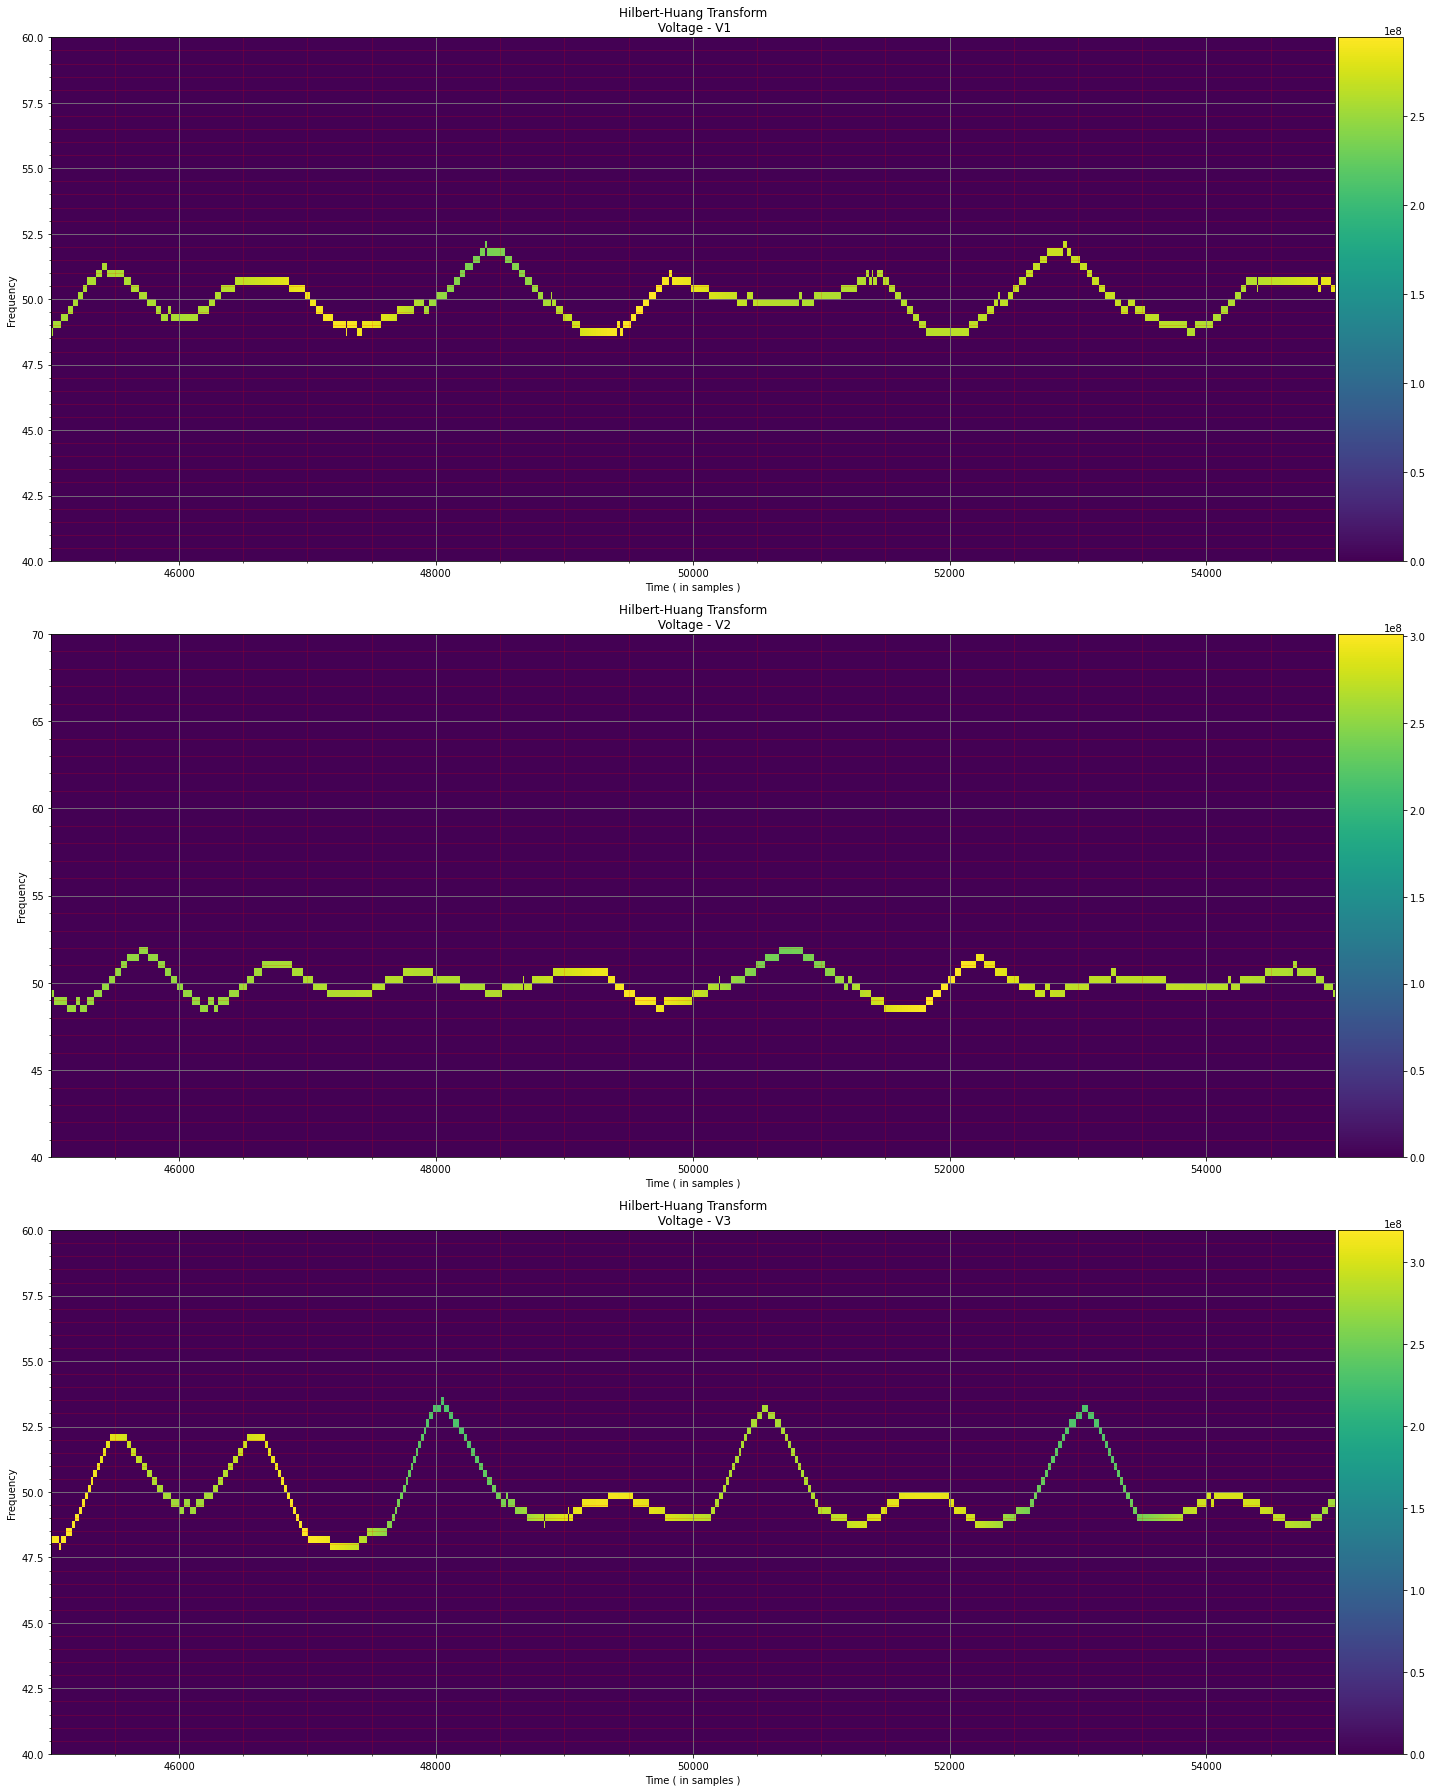

In [52]:
fig , ax = plt.subplots(nrows=3,figsize=(20,25))
print("\nV1")
HH, IF, IP, IA = getHH(V1,8,samp_frq,"\n Voltage - V1",ax[0],s=45000,e=55000,frq=[40,60])
print("\n Max Power detected\n",np.max(IA)**2)
print("\nV2")
HH, IF, IP, IA = getHH(V2,8,samp_frq,"\n Voltage - V2",ax[1],s=45000,e=55000,frq=[40,70])
print("\n Max Power detected \n",np.max(IA)**2)
print("\nV3")
HH, IF, IP, IA = getHH(V3,8,samp_frq,"\n Voltage - V3",ax[2],s=45000,e=55000,frq=[40,60])
print("\n Max Power detected \n",np.max(IA)**2)


### End - V1, V2, & V3 data


V1

 Max Power detected
 283047121.56371695

V2

 Max Power detected 
 311042123.5573095

V3

 Max Power detected 
 306405294.3198835


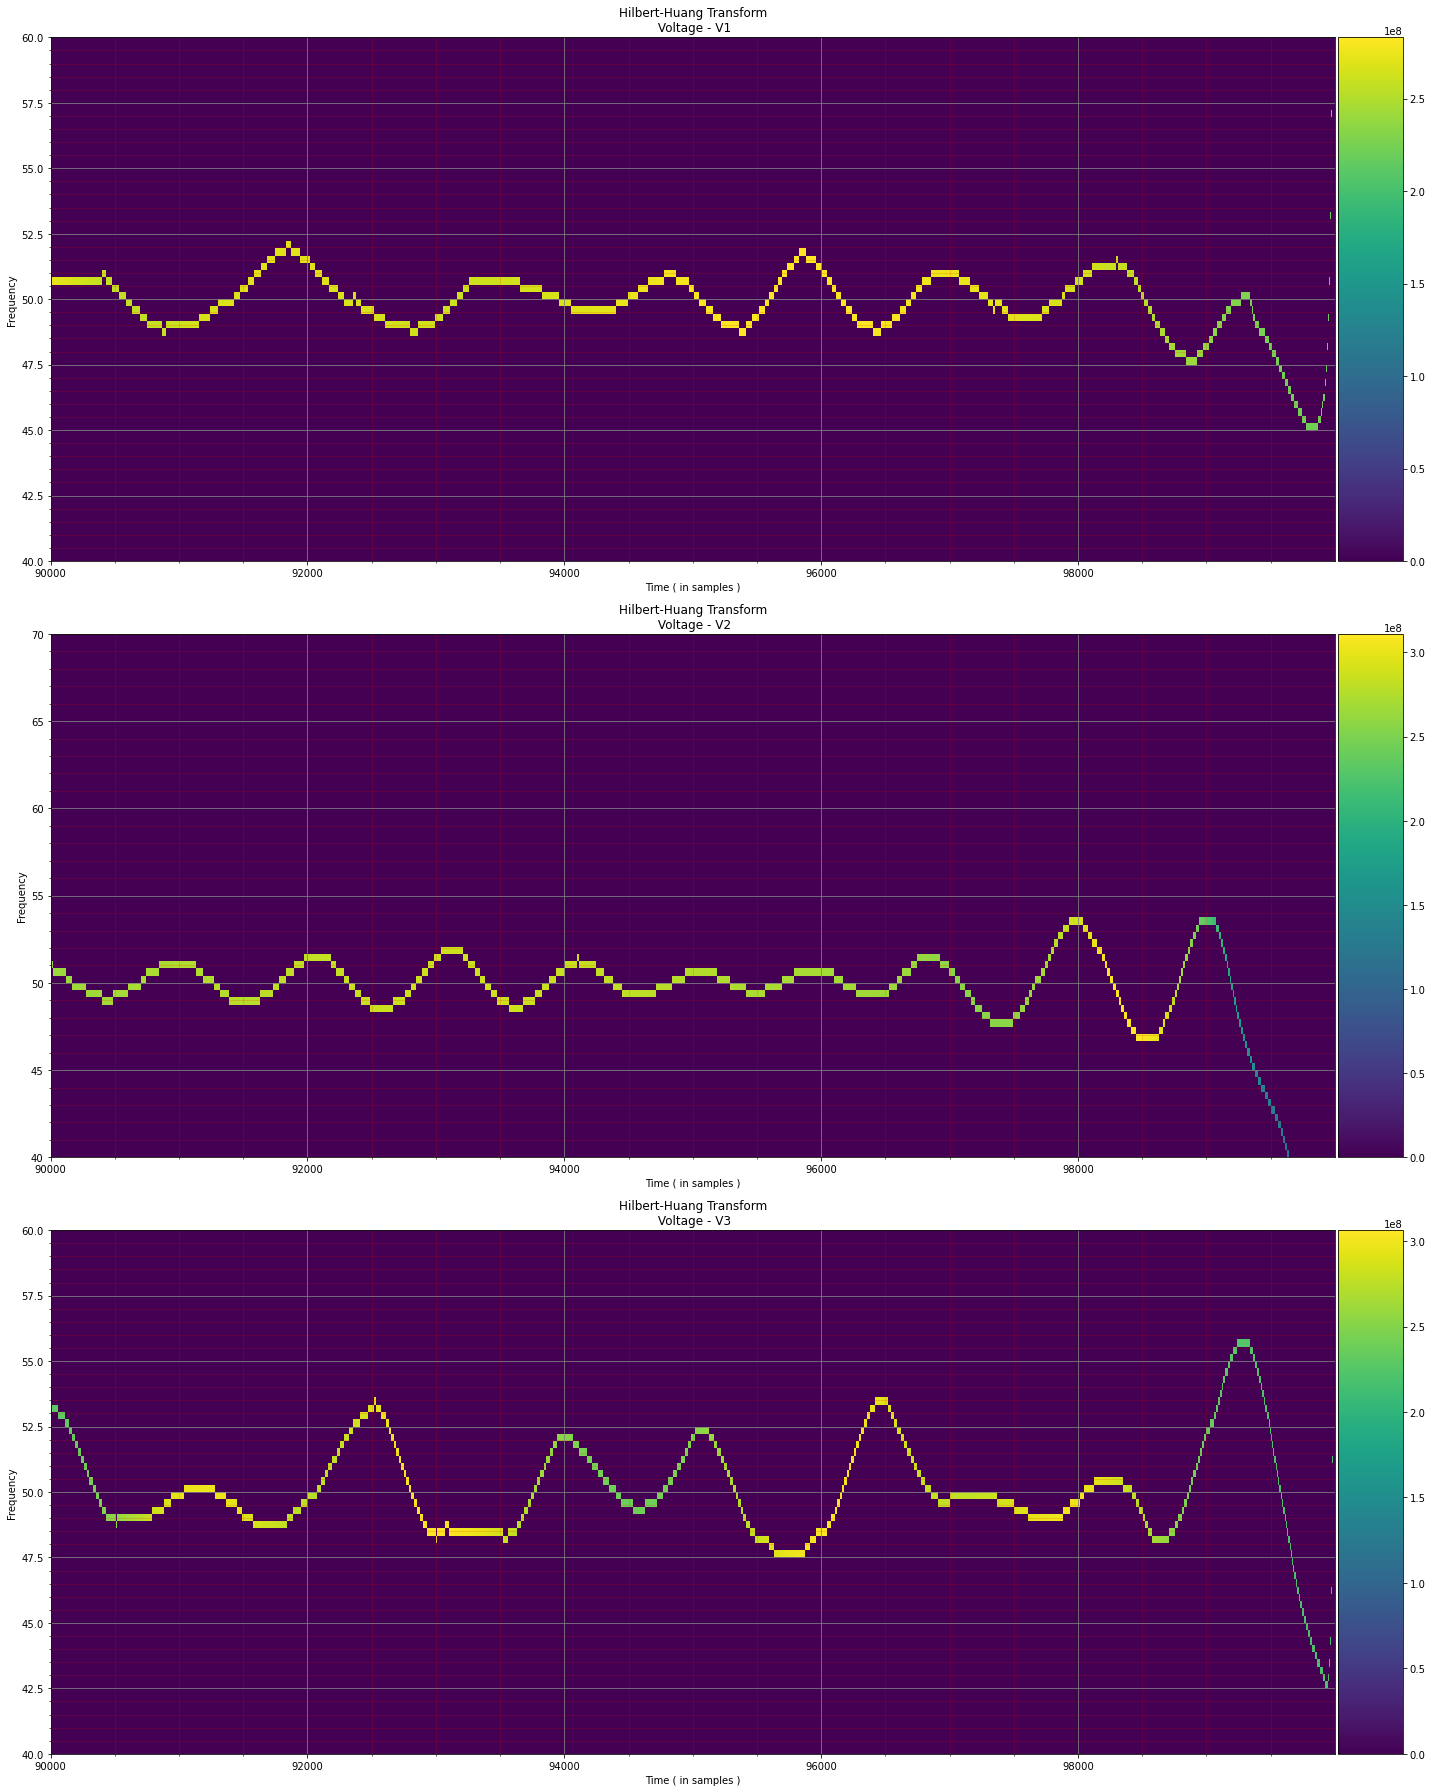

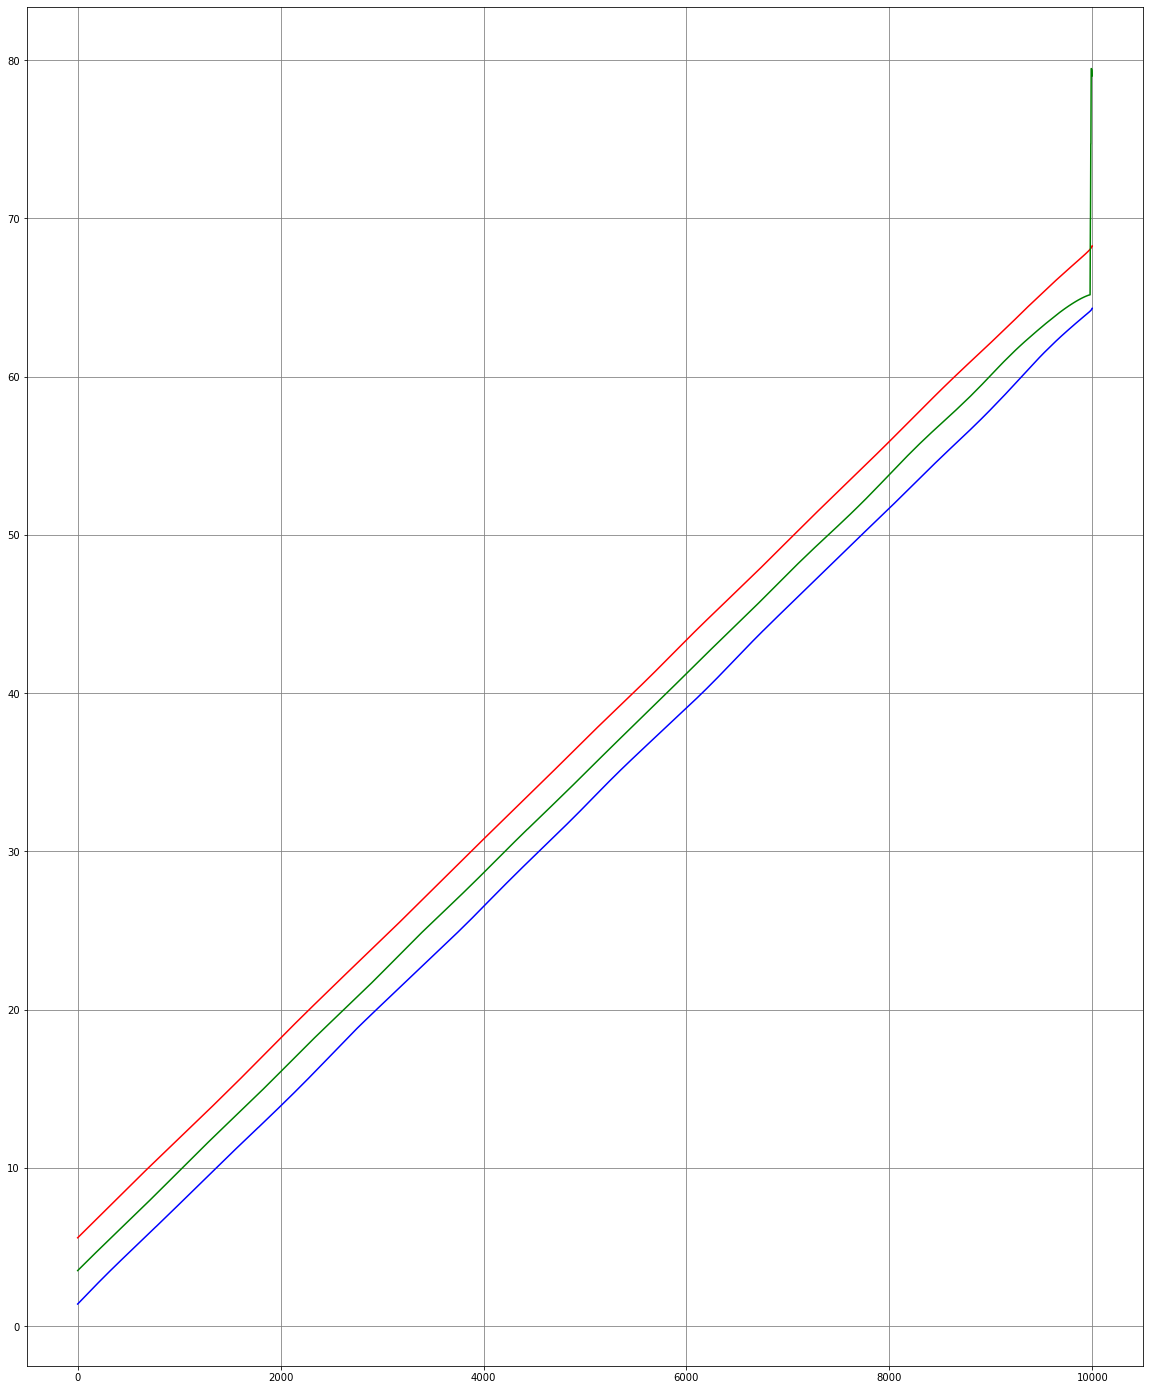

In [53]:
fig , ax = plt.subplots(nrows=3,figsize=(20,25))
fig2 ,ax2 = plt.subplots(nrows=1,figsize=(20,25))
ax2.grid(visible=True, which='both', color='grey', linestyle='-')

print("\nV1")
HH, IF, IP, IA = getHH(V1,8,samp_frq,"\n Voltage - V1",ax[0],s=90000,e=len(T),frq=[40,60])
val , _ = getUP(IP[:, ])
ax2.plot(val,color='r')
print("\n Max Power detected\n",np.max(IA)**2)
print("\nV2")

HH, IF, IP, IA = getHH(V2,8,samp_frq,"\n Voltage - V2",ax[1],s=90000,e=len(T),frq=[40,70])
val, _ = getUP(IP[:, ])
ax2.plot(val,color='g')
print("\n Max Power detected \n",np.max(IA)**2)

print("\nV3")
HH, IF, IP, IA = getHH(V3,8,samp_frq,"\n Voltage - V3",ax[2],s=90000,e=len(T),frq=[40,60])
val, _ = getUP(IP[:, ])
ax2.plot(val,color='b')
print("\n Max Power detected \n",np.max(IA)**2)


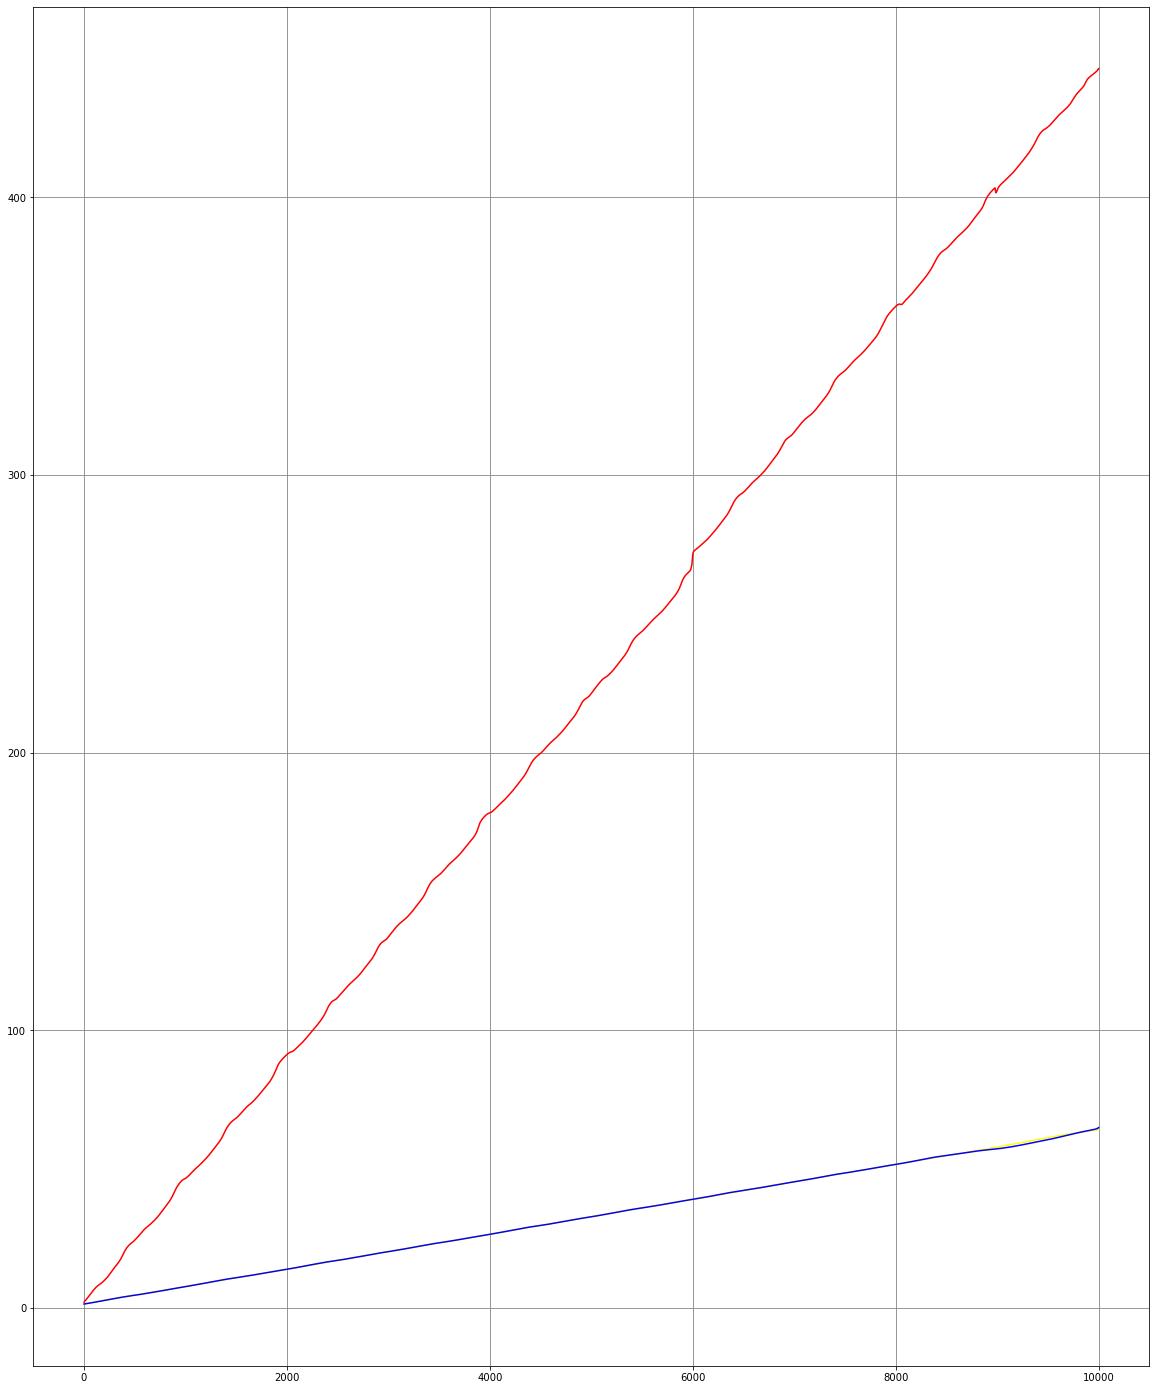

In [54]:
fig2 ,ax2 = plt.subplots(nrows=1,figsize=(20,25))
ax2.grid(visible=True, which='both', color='grey', linestyle='-')

HH, IF, IP, IA = getHH(V3,8,samp_frq,"\n Voltage - V3",ax[2],s=90000,e=len(T),frq=[40,60])
val, _ = getUP(IP[:, ])
ax2.plot(val,color='yellow')    
HH, IF, IP, IA = getHH(V3,7,samp_frq,"\n Voltage - V3",ax[2],s=90000,e=len(T),frq=[40,60])
val, _ = getUP(IP[:, ])
ax2.plot(val,color='b')    
HH, IF, IP, IA = getHH(V3,5,samp_frq,"\n Voltage - V3",ax[2],s=90000,e=len(T),frq=[40,60])
val, _ = getUP(IP[:, ])
ax2.plot(val,color='r')    